Importing Libraries

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

ANN implementation

- loading the cifar-10 dataset

In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

- normalize the pixel values to [0,1]

In [39]:
x_train, x_test = x_train / 255.0, x_test / 255.0

- flatten the images for ANN input

In [40]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

- define the ANN model

In [46]:
ann_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(x_train_flat.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

- compile the model

In [47]:
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

- Early Stopping callback

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=3,            # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights after stopping
)

- train the model

In [49]:
history_ann = ann_model.fit(x_train_flat, y_train, epochs=20,
                            validation_data=(x_test_flat, y_test),
                            callbacks=[early_stopping],         # Add EarlyStopping callback
                             batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.2822 - loss: 2.0037 - val_accuracy: 0.3942 - val_loss: 1.7132
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.3971 - loss: 1.6802 - val_accuracy: 0.4307 - val_loss: 1.5942
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4292 - loss: 1.5974 - val_accuracy: 0.4356 - val_loss: 1.5859
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4512 - loss: 1.5377 - val_accuracy: 0.4528 - val_loss: 1.5265
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.4685 - loss: 1.4875 - val_accuracy: 0.4653 - val_loss: 1.4958
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.4770 - loss: 1.4602 - val_accuracy: 0.4487 - val_loss: 1.5449
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.4897 - loss: 1.4341 - val_accuracy: 0.4634 - val_loss: 1.5033
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.4954 -

- evaluate the model

In [50]:
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test_flat, y_test)
print(f"ANN Test accuracy: {ann_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4979 - loss: 1.4106
ANN Test accuracy: 0.4944


CNN Implementation

- defining CNN model

In [51]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

- compile the model

In [52]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

- Early stopping

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

- train the model

In [54]:
history_cnn = cnn_model.fit(x_train, y_train, epochs=20,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.3571 - loss: 1.7232 - val_accuracy: 0.5361 - val_loss: 1.2925
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 50ms/step - accuracy: 0.5812 - loss: 1.1789 - val_accuracy: 0.6265 - val_loss: 1.0674
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.6469 - loss: 0.9993 - val_accuracy: 0.6526 - val_loss: 0.9850
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.6830 - loss: 0.8969 - val_accuracy: 0.6650 - val_loss: 0.9695
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7177 - loss: 0.8077 - val_accuracy: 0.6912 - val_loss: 0.8747
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7415 - loss: 0.7344 - val_accuracy: 0.6990 - val_loss: 0.8669
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.7602 - loss: 0.6809 - val_accuracy: 0.7026 - val_loss: 0.8713
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.7719 

- evaluate the model

In [55]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test accuracy: {cnn_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7059 - loss: 0.8594
CNN Test accuracy: 0.6990


Visualize accuracy and loss curves

In [56]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

- plotting ANN history

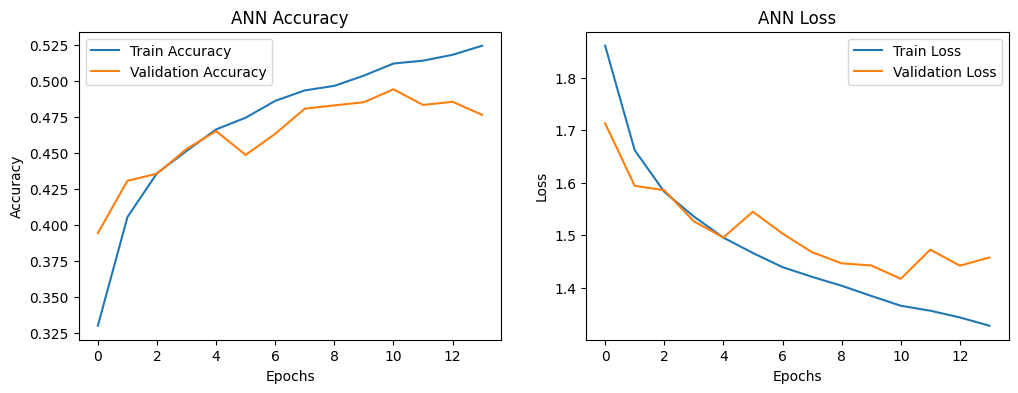

In [57]:
plot_history(history_ann, 'ANN')

- plotting CNN history

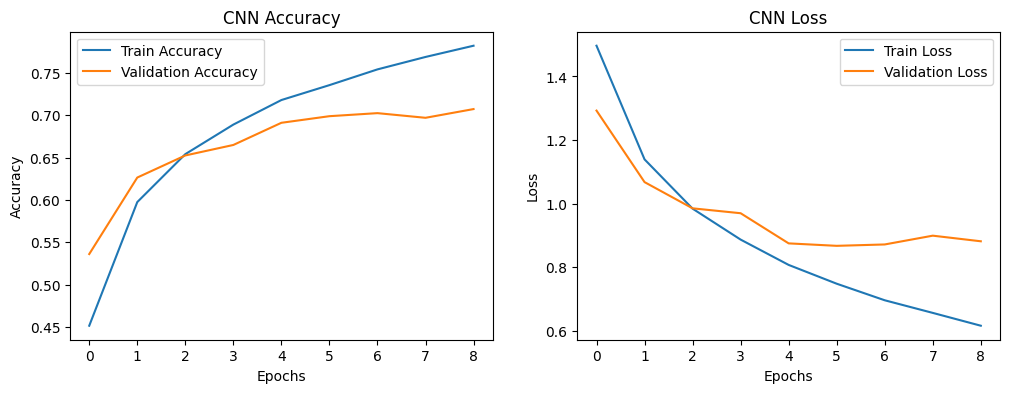

In [58]:
plot_history(history_cnn, 'CNN')